<a href="https://colab.research.google.com/github/katherine2022Udea/TesisEspecializacion/blob/main/3_2_Experimento_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/UDEA-Esp-Analitica-y-Ciencia-de-Datos/EACD-02-ESTADISTICA/master/init.py
import init; init.init(force_download=False); 
from IPython.display import Image

replicating local resources


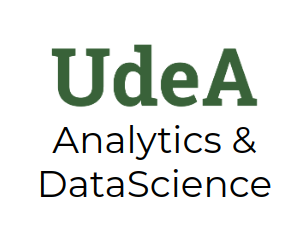

In [2]:
Image("local/imgs/udea-datascience.png")

## **A) Importar Base de Datos**

In [3]:
import numpy as np # Matemetias y Matrices
import pandas as pd # para BD
import matplotlib.pyplot as plt # Graficas
import seaborn as sns # Graficas estadisticas
from scipy.stats import shapiro # Pruebas Estadisticas
from scipy.stats import chi2_contingency # Pruebas de Independencia para Tablas de contingencia
from scipy import stats
### Modelación de Machine Learning
from sklearn.model_selection import train_test_split # Para dividir nuesntra BD en entrenamiento y Test
import statsmodels.api as sm
from scipy.stats import normaltest

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
url='https://raw.githubusercontent.com/katherine2022Udea/TesisEspecializacion/main/BD_Experimento_III.csv'
df=pd.read_csv(url)

# **4) Modelación**



## **Selección de variables**

In [5]:
Y=df['overall_survival']
X=df.drop("overall_survival",axis=1)
X.shape

(1423, 74)

**División train y test**

Evaluar la capacidad predictiva de un modelo consiste en comprobar cómo de próximas son sus predicciones a los verdaderos valores de la variable respuesta. Para poder cuantificarlo de forma correcta, se necesita disponer de un conjunto de observaciones, de las que se conozca la variable respuesta, pero que el modelo no haya "visto", es decir, que no hayan participado en su ajuste. Con esta finalidad, se dividen los datos disponibles en un conjunto de entrenamiento y un conjunto de test.

Es importante verificar que la distribución de la variable respuesta es similar en el conjunto de entrenamiento y en el de test. Para asegurar que esto se cumple, la función train_test_split() de scikit-learn permite, en problemas de clasificación, identificar con el argumento stratify la variable en base a la cual hacer el reparto.

Este tipo de reparto estratificado asegura que el conjunto de entrenamiento y el de test sean similares en cuanto a la variable respuesta, sin embargo, no garantiza que ocurra lo mismo con los predictores.

In [6]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1214,stratify=Y)

In [7]:
y_train.value_counts()

1    641
0    497
Name: overall_survival, dtype: int64

In [8]:
y_test.value_counts()

1    160
0    125
Name: overall_survival, dtype: int64

In [9]:
print(x_train.shape)
print(x_test.shape)

(1138, 74)
(285, 74)


## **4.1) Árboles de decisión con Python:clasificación**

In [10]:
#!pip install --upgrade scikit-learn

In [11]:
# Modelo
from sklearn.tree import DecisionTreeClassifier
# Graficos
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

# Para optimizar Modelos, Fase validacion
from sklearn.model_selection import GridSearchCV
# evaluar modelos
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import  metrics
from sklearn.metrics import precision_recall_fscore_support as score

**Creamos la funcion o modelo**

In [12]:
Modelo1=DecisionTreeClassifier( max_depth=7,criterion = 'gini',random_state= 123) # profundidad hiperparametro a optimizar
Modelo1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=7, random_state=123)

**Grafico**

Profundidad del árbol: 7
Número de nodos terminales: 61


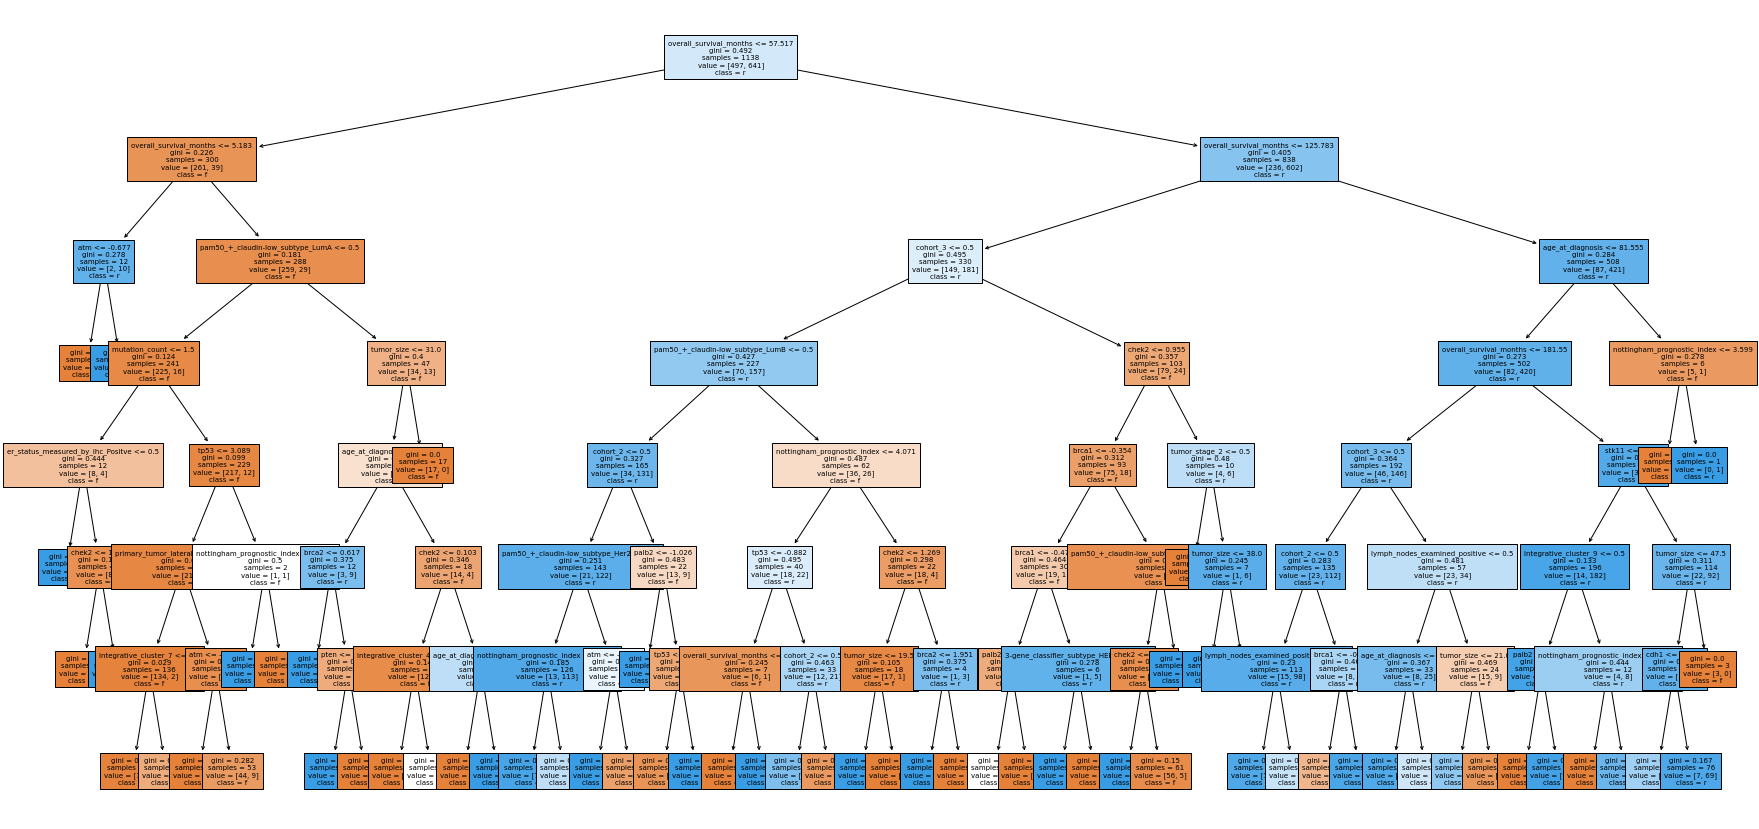

In [13]:
fig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {Modelo1.get_depth()}")
print(f"Número de nodos terminales: {Modelo1.get_n_leaves()}")
plot=plot_tree(decision_tree=Modelo1,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

### **Predicción y evaluación del modelo**

In [14]:
predicciones_train=Modelo1.predict(X=x_train)
predicciones_train

array([0, 1, 1, ..., 1, 1, 0])

In [15]:
# train
metrics.accuracy_score(y_train,predicciones_train)

0.9033391915641477

In [16]:
predicciones_test=Modelo1.predict(X=x_test)
Probabilidad_test_M1=Modelo1.predict_proba(X=x_test)

In [17]:
# train
metrics.accuracy_score(y_train,predicciones_train)

0.9033391915641477

In [18]:
# test
Accuracy_AD_VS_DD=metrics.accuracy_score(y_test,predicciones_test)
print(Accuracy_AD_VS_DD)

0.7368421052631579


In [19]:
Reporte_AD_VS_DD=metrics.classification_report(y_test,predicciones_test)

print(Reporte_AD_VS_DD)

              precision    recall  f1-score   support

           0       0.73      0.63      0.68       125
           1       0.74      0.82      0.78       160

    accuracy                           0.74       285
   macro avg       0.74      0.73      0.73       285
weighted avg       0.74      0.74      0.73       285



In [20]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD_0=fscore[0]
f1_Score_AD_1=fscore[1]
print(f1_Score_AD_0)
print(f1_Score_AD_1)

0.6781115879828327
0.7774480712166171


### **Matrix de Confusión**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


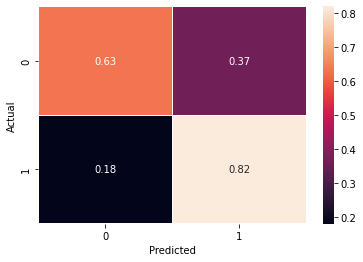

In [21]:
data1 = {"y_Actual":y_test,
        "y_Predicted": Modelo1.predict(x_test)
        }

df = pd.DataFrame(data1, columns=['y_Actual','y_Predicted'])
confusion_matrix1 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada=confusion_matrix1.astype('float') / confusion_matrix1.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada, annot=True,linewidths = 0.01)
plt.show()

### **Podando del árbol (pruning)**


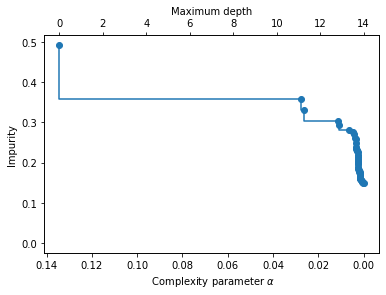

In [22]:
f=Modelo1
f.get_n_leaves() # number of leaves of the tree
f.get_depth()    # depth of the tree

f_alpha = f.cost_complexity_pruning_path(x_train, y_train)
alphas = f_alpha['ccp_alphas']
impurs = f_alpha['impurities']
fs = []
for j in alphas:
    f = DecisionTreeClassifier(ccp_alpha=j, random_state=77)
    f.fit(x_train, y_train)
    fs.append(f)
fs
nodes = []
depth = []
for j in range(0, alphas.shape[0]):
    nodes.append(fs[j].tree_.node_count)
    depth.append(fs[j].tree_.max_depth)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
plt.plot(alphas, impurs, marker='o', drawstyle='steps-post')
ax.invert_xaxis()
plt.xlabel(r' Complexity parameter $\alpha$')
plt.ylabel('Impurity')
ax1 = ax.twiny()
#plt.plot(nodes, alphas, marker='o', drawstyle='steps-post', color='w')
#plt.xlabel('No. of terminal nodes')
plt.plot(depth, alphas, marker='o', drawstyle="steps-post", color='w')
plt.xlabel('Maximum depth')
plt.show()


results = {'alpha': alphas, 'Imputiry': impurs, 'Nodes': nodes, 'Depth': depth}
results = pd.DataFrame(results, columns = ['alpha', 'Imputiry', 'Nodes', 'Depth'])

**Accuracy vs alpha para training y testing**

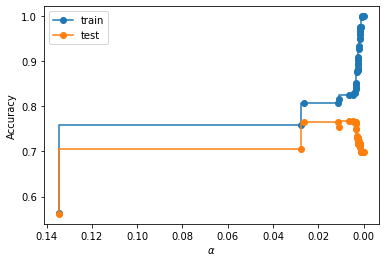

In [23]:
train_scores = [f.score(x_train, y_train) for f in fs]
test_scores  = [f.score(x_test, y_test)   for f in fs]

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_xlabel(r'$\alpha$')
ax.set_ylabel('Accuracy')
#ax.set_title(r'Accuracy vs $\alpha$')
ax.plot(alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(alphas, test_scores,  marker='o', label='test',  drawstyle='steps-post')
ax.invert_xaxis()
ax.legend()
plt.show()

#### **Validacion Cruzada**

In [24]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [25]:
f = Modelo1
max_depth = range(1, 8, 1)
min_samples_leaf = range(1, 10, 1)
param_grid = dict(max_depth = max_depth , min_samples_leaf = min_samples_leaf)
kfold = KFold(n_splits=10, shuffle=False, random_state=None)
grid_search = GridSearchCV(f, param_grid, scoring = 'accuracy', n_jobs = -1, cv = kfold, verbose = 0)
grid_result = grid_search.fit(x_train, y_train)


print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.806761 using {'max_depth': 3, 'min_samples_leaf': 1}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 1}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 2}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 3}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 4}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 5}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 6}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 7}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 8}
0.753128 with: {'max_depth': 1, 'min_samples_leaf': 9}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 1}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 2}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 3}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 4}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 5}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 6}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 7}
0.757514 with: {'max_depth': 2, 'min_samples_leaf': 8}
0.75

**Pruned tree**

In [26]:


f = DecisionTreeClassifier(
                           criterion='gini',    # 'gini' or 'entropy' impurity functions
                          max_depth=5,         # maximum depth of the tree
                          min_samples_leaf=3, 
                          ccp_alpha=0.000,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

print(f)
print('Depth:', f.get_depth())            # depth of the tree
print('No. of leaves:', f.get_n_leaves()) # number of leaves of the tree

# rules of the decision tree
feature_names = list(x_train.columns) # features' names to plot the tree
ft = export_text(f, feature_names=feature_names)
#print(ft)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=3, random_state=77)
Depth: 5
No. of leaves: 23


**Tree plot**

Profundidad del árbol: 5
Número de nodos terminales: 23


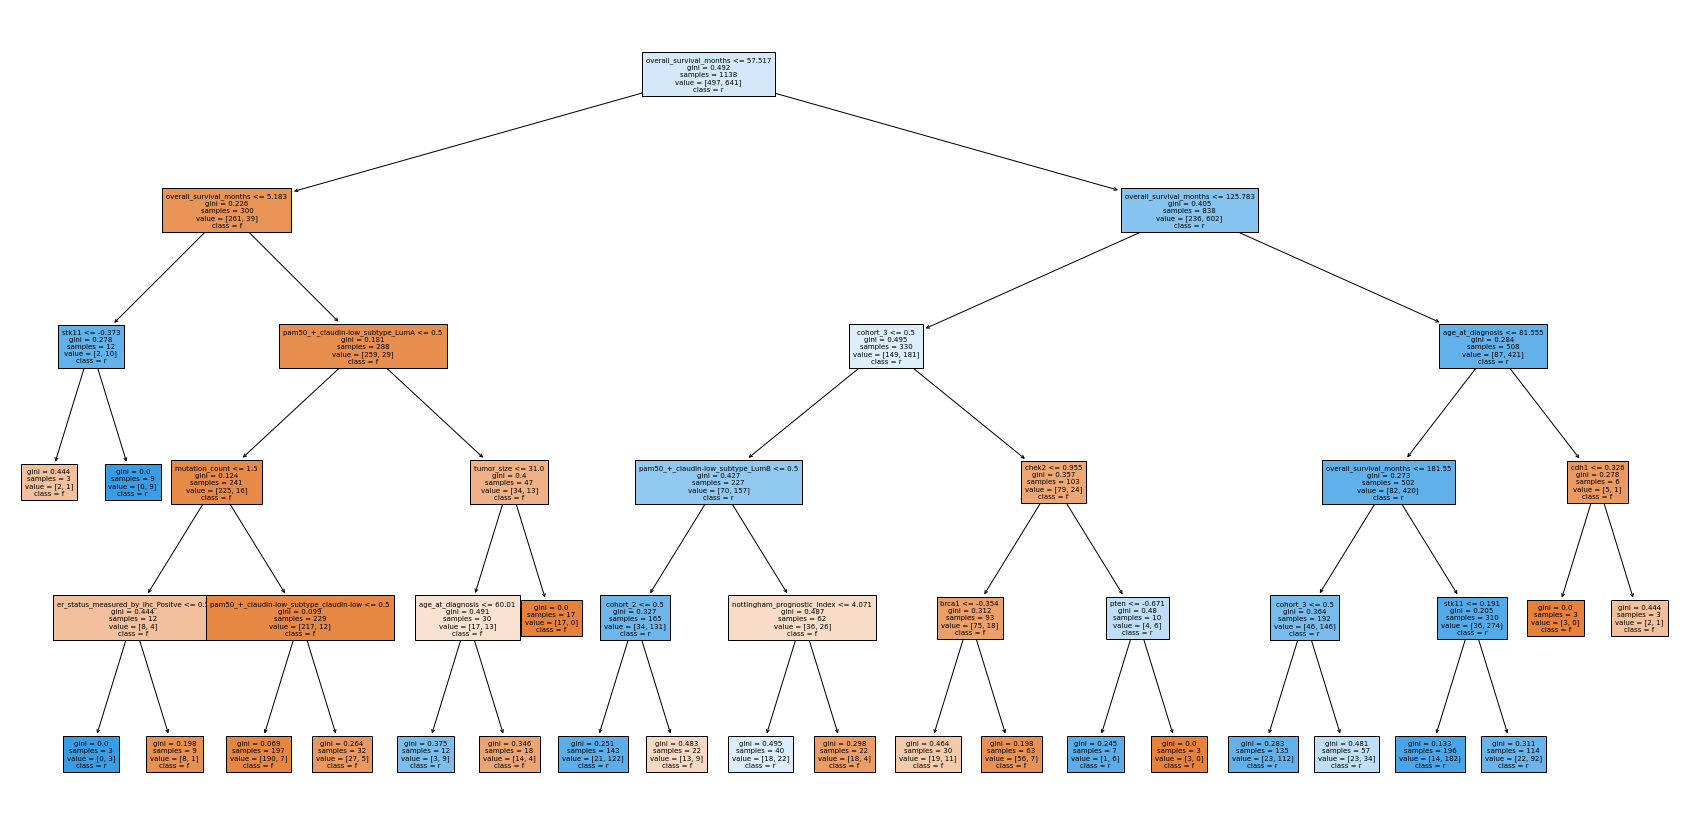

In [27]:
ig, ax = plt.subplots(figsize=(30, 15))
print(f"Profundidad del árbol: {f.get_depth()}")
print(f"Número de nodos terminales: {f.get_n_leaves()}")
plot=plot_tree(decision_tree=f,
              feature_names=x_train.columns,
                filled        = True,
               fontsize      = 7,
              class_names="fraud",
                ax            = ax
              )

**Evaluamos Prediccion**

In [28]:
predicciones_train=f.predict(X=x_train)
predicciones_train

array([0, 1, 1, ..., 1, 1, 0])

In [29]:
predicciones_test=f.predict(X=x_test)
Probabilidad_test_M2=f.predict_proba(X=x_test)

In [30]:
Accuray_train_Optimo=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_Optimo=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_Optimo)
print(Accuray_test_Optimo)

0.8462214411247804
0.7649122807017544


In [31]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_AD1_0=fscore[0]
f1_Score_AD1_1=fscore[1]

In [32]:
Reporte_AD_Optimo=metrics.classification_report(y_test,predicciones_test)
print(Reporte_AD_Optimo)

              precision    recall  f1-score   support

           0       0.80      0.62      0.70       125
           1       0.75      0.88      0.81       160

    accuracy                           0.76       285
   macro avg       0.77      0.75      0.75       285
weighted avg       0.77      0.76      0.76       285



## **Matrix Confusion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


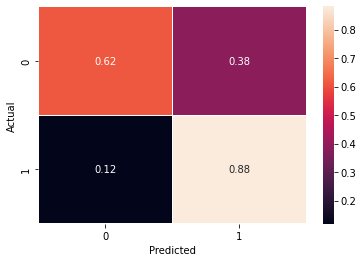

In [33]:
data2 = {"y_Actual":y_test,
        "y_Predicted": f.predict(x_test)
        }

df = pd.DataFrame(data2, columns=['y_Actual','y_Predicted'])
confusion_matrix2 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada1=confusion_matrix2.astype('float') / confusion_matrix2.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada1, annot=True,linewidths = 0.01)
plt.show()

In [34]:
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")

importancia_predictores = pd.DataFrame(
                            {'predictor': x_train.columns,
                             'importancia': f.feature_importances_}
                            )
importancia_predictores.sort_values('importancia', ascending=False)

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
4,overall_survival_months,0.679729
31,cohort_3,0.115894
26,pam50_+_claudin-low_subtype_LumB,0.042904
0,age_at_diagnosis,0.031666
30,cohort_2,0.025510
...,...,...
39,her2_status_measured_by_snp6_NEUTRAL,0.000000
40,her2_status_measured_by_snp6_UNDEF,0.000000
41,her2_status_Positive,0.000000
42,tumor_other_histologic_subtype_Lobular,0.000000


overall_survival_months                    0.679729
cohort_3                                   0.115894
pam50_+_claudin-low_subtype_LumB           0.042904
age_at_diagnosis                           0.031666
cohort_2                                   0.025510
stk11                                      0.014011
tumor_size                                 0.013825
nottingham_prognostic_index                0.013055
er_status_measured_by_ihc_Positve          0.012062
pam50_+_claudin-low_subtype_LumA           0.011791
pten                                       0.010468
chek2                                      0.010121
brca1                                      0.009005
mutation_count                             0.006106
pam50_+_claudin-low_subtype_claudin-low    0.002722
dtype: float64


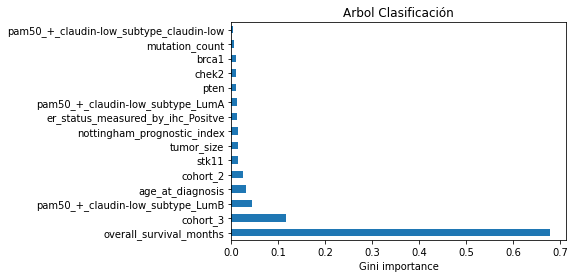

In [35]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(f.feature_importances_, index=x_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(15))

feat_importances.nlargest(15).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini importance')
plt.title("Arbol Clasificación")
#plt.ylabel('Feature')
plt.show()

## **4.2) Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           max_leaf_nodes=None,
                           #
                           n_estimators=100, ################################### Cuantos Arboles?
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=False,
                           random_state=77
                           )

rf = rf.fit(x_train, y_train)
rf

RandomForestClassifier(min_samples_split=3, random_state=77)

**Evaluación del Modelo**

In [37]:
predicciones_train=rf.predict(X=x_train)
predicciones_test=rf.predict(X=x_test)

Accuray_train_RF=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF)
print(Accuray_test_RF)

1.0
0.7894736842105263


In [38]:
Probabilidad_test_M3=rf.predict_proba(X=x_test)

In [39]:
Reporte_RF=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF)

              precision    recall  f1-score   support

           0       0.83      0.66      0.73       125
           1       0.77      0.89      0.83       160

    accuracy                           0.79       285
   macro avg       0.80      0.77      0.78       285
weighted avg       0.79      0.79      0.79       285



In [40]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF_0=fscore[0]
f1_Score_RF_1=fscore[1]
print(f1_Score_RF_0)
print(f1_Score_RF_1)

0.7321428571428571
0.8265895953757225


## **Matrix Confusión**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


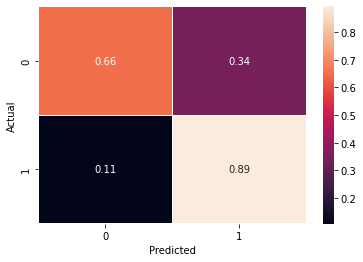

In [41]:
data3 = {"y_Actual":y_test,
        "y_Predicted": rf.predict(x_test)
        }

df = pd.DataFrame(data3, columns=['y_Actual','y_Predicted'])
confusion_matrix3 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada2=confusion_matrix3.astype('float') / confusion_matrix3.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada2, annot=True,linewidths = 0.01)
plt.show()

### **Optimización de Hiperparametros**

In [42]:
from sklearn.model_selection import GridSearchCV, KFold

# define grid search
B = 50 # Costo computacional, recomiendo mas 50
b = range(1, B + 1)


grid = dict(n_estimators=b)
kfold = KFold(n_splits=5, shuffle=False, random_state=None)
grid_search = GridSearchCV(estimator=rf, param_grid=grid, n_jobs=-1, cv=kfold, scoring='accuracy')
grid_result = grid_search.fit(x_train, y_train)



# summarize results
print('Best: %f using %s' % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
params = grid_result.cv_results_['params']
for mean, param in zip(means, params):
    print('%f with: %r' % (mean, param))

Best: 0.799672 using {'n_estimators': 35}
0.640590 with: {'n_estimators': 1}
0.641487 with: {'n_estimators': 2}
0.698605 with: {'n_estimators': 3}
0.704769 with: {'n_estimators': 4}
0.718815 with: {'n_estimators': 5}
0.717942 with: {'n_estimators': 6}
0.733739 with: {'n_estimators': 7}
0.744323 with: {'n_estimators': 8}
0.749571 with: {'n_estimators': 9}
0.758355 with: {'n_estimators': 10}
0.758339 with: {'n_estimators': 11}
0.762760 with: {'n_estimators': 12}
0.760975 with: {'n_estimators': 13}
0.770666 with: {'n_estimators': 14}
0.779446 with: {'n_estimators': 15}
0.776814 with: {'n_estimators': 16}
0.780323 with: {'n_estimators': 17}
0.787356 with: {'n_estimators': 18}
0.789107 with: {'n_estimators': 19}
0.788241 with: {'n_estimators': 20}
0.794381 with: {'n_estimators': 21}
0.790873 with: {'n_estimators': 22}
0.796147 with: {'n_estimators': 23}
0.786479 with: {'n_estimators': 24}
0.793504 with: {'n_estimators': 25}
0.792635 with: {'n_estimators': 26}
0.790880 with: {'n_estimators':

In [43]:
from sklearn.ensemble import RandomForestClassifier

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           #                       
                           n_estimators=35,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=True,
                           random_state=77
                          )

oob_error   = []
train_error = []
test_error  = []
for b in range(1, B + 1):
    f.set_params(n_estimators = b)
    f.fit(x_train, y_train)
    # errors
    oob_error.append(1 - f.oob_score_)
    train_error.append(1 - f.score(x_train, y_train))
    test_error.append(1 - f.score(x_test, y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:564: UserWarning: Some inputs do not have OOB scores. Thi

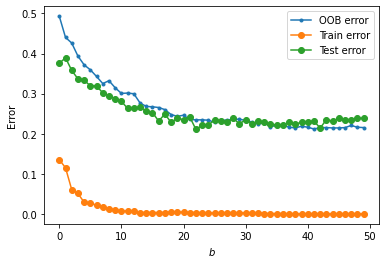

In [44]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.set_xlabel(r'$b$')
ax.set_ylabel('Error')
ax.plot(oob_error, marker='.', label='OOB error')
ax.plot(train_error, marker='o', label='Train error')
ax.plot(test_error, marker='o', label='Test error')
ax.legend()
plt.show()

**Random Forest Optimo**

In [45]:
import numpy as np

f = RandomForestClassifier(
                           criterion='gini',    # 'entropy'
                           max_depth=None,      # maximum depth of the tree
                           min_samples_split=3, # minimum number of samples required to split an internal node
                           min_samples_leaf=1,  # minimum number of samples required to be at a leaf node
                           #                       
                           n_estimators=35,
                           max_features='auto', # 'auto', then max_features=sqrt(n_features)
                           bootstrap=True,
                           oob_score=True,
                           random_state=77
                          )

f = f.fit(x_train, y_train)

In [46]:
# ------------------------------------------------------------------------------
modelo_final = f#grid_result.best_estimator_
modelo_final 

RandomForestClassifier(min_samples_split=3, n_estimators=35, oob_score=True,
                       random_state=77)

In [47]:
predicciones_train=modelo_final.predict(X=x_train)
predicciones_test=modelo_final.predict(X=x_test)

Accuray_train_RF_O=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_RF_O=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_RF_O)
print(Accuray_test_RF_O)

0.9991212653778558
0.775438596491228


In [48]:
Probabilidad_test_M4=modelo_final.predict_proba(X=x_test)

In [49]:
Reporte_RF_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_RF_O)

              precision    recall  f1-score   support

           0       0.81      0.64      0.71       125
           1       0.76      0.88      0.82       160

    accuracy                           0.78       285
   macro avg       0.78      0.76      0.76       285
weighted avg       0.78      0.78      0.77       285



In [50]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_RF1_0=fscore[0]
f1_Score_RF1_1=fscore[1]
print(f1_Score_RF1_0)
print(f1_Score_RF1_1)

0.7142857142857143
0.815028901734104


## **Matrix confusion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()


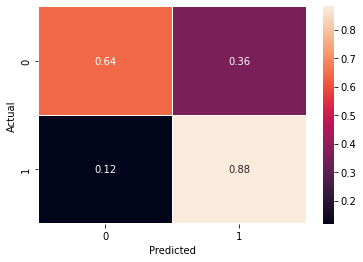

In [51]:
data4 = {"y_Actual":y_test,
        "y_Predicted": modelo_final.predict(x_test)
        }

df = pd.DataFrame(data4, columns=['y_Actual','y_Predicted'])
confusion_matrix4 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada3=confusion_matrix4.astype('float') / confusion_matrix4.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada3, annot=True,linewidths = 0.01)
plt.show()

**Importancia de Variables**

overall_survival_months          0.201331
nottingham_prognostic_index      0.057519
age_at_diagnosis                 0.050383
tumor_size                       0.045609
lymph_nodes_examined_positive    0.044884
tp53                             0.044694
chek2                            0.040975
pten                             0.038824
atm                              0.037120
brca1                            0.036453
cdh1                             0.034096
palb2                            0.033868
brca2                            0.033574
stk11                            0.033230
mutation_count                   0.024085
dtype: float64


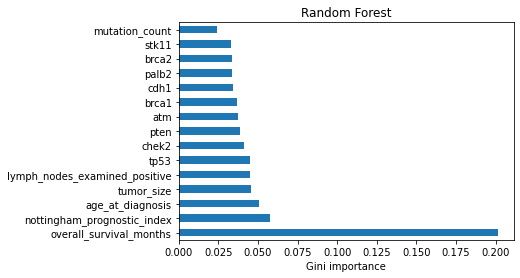

In [52]:
import matplotlib.pyplot as plt

feat_importances = pd.Series(modelo_final.feature_importances_, index=x_train.columns)

feat_importances = feat_importances.sort_values(ascending=False)
print(feat_importances.head(15))

feat_importances.nlargest(15).plot(kind='barh', color='#1f77b4')
plt.xlabel('Gini importance')
plt.title("Random Forest")
#plt.ylabel('Feature')
plt.show()

In [53]:
VariablesImportance=feat_importances.head(15).index.to_list()

## **4.3) Boosting**

In [54]:
x_train=x_train[VariablesImportance]
x_test=x_test[VariablesImportance]

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
Modelo_GBC=GradientBoostingClassifier( max_depth=7,
                                      loss="deviance",
                                      n_estimators=20, # Recomiendo
                                      learning_rate=1.0,
                                      random_state=77# semilla 
                                     )

Modelo_GBC.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=1.0, max_depth=7, n_estimators=20,
                           random_state=77)

**Poder de Prediccion**

In [56]:
predicciones_train=Modelo_GBC.predict(X=x_train)
predicciones_test=Modelo_GBC.predict(X=x_test)
Accuray_train_GBC=metrics.accuracy_score(y_train,predicciones_train)
Accuray_test_GBC=metrics.accuracy_score(y_test,predicciones_test)
print(Accuray_train_GBC)
print(Accuray_test_GBC)

1.0
0.7017543859649122


In [57]:
Probabilidad_test_M5=Modelo_GBC.predict_proba(X=x_test)

In [58]:
Reporte_GBC_O=metrics.classification_report(y_test,predicciones_test)
print(Reporte_GBC_O)

              precision    recall  f1-score   support

           0       0.68      0.60      0.64       125
           1       0.71      0.78      0.75       160

    accuracy                           0.70       285
   macro avg       0.70      0.69      0.69       285
weighted avg       0.70      0.70      0.70       285



In [59]:
precision, recall, fscore, support = score(y_test,predicciones_test)
f1_Score_B_0=fscore[0]
f1_Score_B_1=fscore[1]
print(f1_Score_B_0)
print(f1_Score_B_1)

0.6382978723404256
0.7462686567164178


## **Matrix Confusion**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


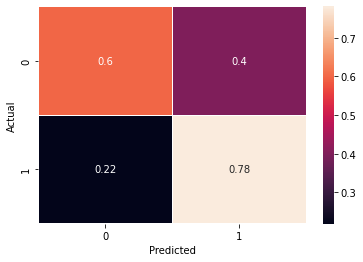

In [60]:
data5 = {"y_Actual":y_test,
        "y_Predicted": Modelo_GBC.predict(X=x_test)
        }

df = pd.DataFrame(data5, columns=['y_Actual','y_Predicted'])

confusion_matrix5 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada4=confusion_matrix5.astype('float') / confusion_matrix5.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada4, annot=True,linewidths = 0.01)
plt.show()


## **4.4) Logit (Inferencia)**


In [61]:
x_train,x_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=1234,stratify=Y)

In [62]:
import statsmodels.api as sm # statsmodels Seres Tiempo
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [63]:
x_train_1=sm.add_constant(x_train,prepend=True)
x_test_1=sm.add_constant(x_test,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**Modelo Logit**

In [64]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)

**Selección de Variables**

Selección univariante Las pruebas estadísticas se pueden utilizar para seleccionar aquellas características que tienen la relación más fuerte con la variable de salida. La biblioteca scikit-learn proporciona la clase SelectKBest que se puede usar con un conjunto de diferentes pruebas estadísticas para seleccionar un número específico de características.

In [65]:
x_train.shape[1]

74

In [66]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, mutual_info_classif

In [67]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression

In [68]:
ModeloBaseRL=LogisticRegression(penalty="none")
#ModeloBaseRL.fit(x_train,y_train)
#sfs=SequentialFeatureSelector(ModeloBaseRL,direction="forward") ### backward
#sfs.fit(x_train,y_train)
#sfs.get_feature_names_out()

In [69]:
#sfs.get_feature_names_out()

In [70]:
Variables2=['age_at_diagnosis', 'overall_survival_months', 'brca2',
       'chek2', 'type_of_breast_surgery_MASTECTOMY',
       'cancer_type_Breast Sarcoma',
       'cancer_type_detailed_Breast Invasive Lobular Carcinoma',
       'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma',
       'cellularity_Low', 'cellularity_Moderate',
       'pam50_+_claudin-low_subtype_LumA',
       'pam50_+_claudin-low_subtype_NC',
       'pam50_+_claudin-low_subtype_Normal', 'cohort_2', 'cohort_3',
       'cohort_4', 'cohort_5', 'er_status_measured_by_ihc_Positve',
       'er_status_Positive', 'neoplasm_histologic_grade_2',
       'tumor_other_histologic_subtype_Medullary',
       'tumor_other_histologic_subtype_Other',
       'tumor_other_histologic_subtype_Tubular/ cribriform',
        'inferred_menopausal_state_Pre',
       'integrative_cluster_4ER+', 'integrative_cluster_6',
       'integrative_cluster_8',
       'tumor_stage_1',
       'tumor_stage_4']

In [71]:
len(Variables2)

29

In [72]:
pd.set_option('display.float_format','{:.2f}'.format)
Mejores_Variables=SelectKBest(score_func=mutual_info_classif,k=x_train.shape[1])
fit=Mejores_Variables.fit(x_train,y_train)
df_puntajes=pd.DataFrame(fit.scores_)
df_Columnas=pd.DataFrame(x_train.columns)
df_completo=pd.concat([df_Columnas,df_puntajes],axis=1)
df_completo.columns=["Variable","Puntaje"]
#################################################### Seleccion 10 Variables ######################
td=df_completo.nlargest(10,"Puntaje")
td

,Variable,Puntaje
4,overall_survival_months,0.18
3,nottingham_prognostic_index,0.06
15,type_of_breast_surgery_MASTECTOMY,0.04
1,lymph_nodes_examined_positive,0.03
47,tumor_other_histologic_subtype_Tubular/ cribri...,0.03
65,pr_status_Positive,0.03
10,chek2,0.03
5,tumor_size,0.02
26,pam50_+_claudin-low_subtype_LumB,0.02
72,tumor_stage_3,0.02


In [73]:
Variables=Variables2#td["Variable"].values
Variables

['age_at_diagnosis',
 'overall_survival_months',
 'brca2',
 'chek2',
 'type_of_breast_surgery_MASTECTOMY',
 'cancer_type_Breast Sarcoma',
 'cancer_type_detailed_Breast Invasive Lobular Carcinoma',
 'cancer_type_detailed_Breast Invasive Mixed Mucinous Carcinoma',
 'cellularity_Low',
 'cellularity_Moderate',
 'pam50_+_claudin-low_subtype_LumA',
 'pam50_+_claudin-low_subtype_NC',
 'pam50_+_claudin-low_subtype_Normal',
 'cohort_2',
 'cohort_3',
 'cohort_4',
 'cohort_5',
 'er_status_measured_by_ihc_Positve',
 'er_status_Positive',
 'neoplasm_histologic_grade_2',
 'tumor_other_histologic_subtype_Medullary',
 'tumor_other_histologic_subtype_Other',
 'tumor_other_histologic_subtype_Tubular/ cribriform',
 'inferred_menopausal_state_Pre',
 'integrative_cluster_4ER+',
 'integrative_cluster_6',
 'integrative_cluster_8',
 'tumor_stage_1',
 'tumor_stage_4']

In [74]:
x_train_Seleccion_V=x_train[Variables]
x_test_Seleccion_V=x_test[Variables]

In [75]:
x_train_1=sm.add_constant(x_train_Seleccion_V,prepend=True)
x_test_1=sm.add_constant(x_test_Seleccion_V,prepend=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [76]:
Modelo_Logit=sm.Logit(endog=y_train,exog=x_train_1)
Modelo_Logit=Modelo_Logit.fit()# method='bfgs

         Current function value: 0.427757
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [77]:
print(Modelo_Logit.summary2())

                                                Results: Logit
Model:                              Logit                          Pseudo R-squared:               0.376      
Dependent Variable:                 overall_survival               AIC:                            1033.5754  
Date:                               2022-05-28 22:40               BIC:                            1184.6862  
No. Observations:                   1138                           Log-Likelihood:                 -486.79    
Df Model:                           29                             LL-Null:                        -779.67    
Df Residuals:                       1108                           LLR p-value:                    5.7765e-105
Converged:                          0.0000                         Scale:                          1.0000     
No. Iterations:                     35.0000                                                                   
-------------------------------------------------

**Evaluación**

In [78]:
Probabilidad_train=Modelo_Logit.predict(exog=x_train_1)
Predicciones_train=np.where(Probabilidad_train < 0.5,0,1)
Accuracy_Log_train=metrics.accuracy_score(y_train,Predicciones_train)
print(Accuracy_Log_train)
Reporte_Log_train=metrics.classification_report(y_train,Predicciones_train)
print(Reporte_Log_train)
precision, recall, fscore, support = score(y_train,Predicciones_train)


0.827768014059754
              precision    recall  f1-score   support

           0       0.82      0.77      0.80       497
           1       0.83      0.87      0.85       641

    accuracy                           0.83      1138
   macro avg       0.83      0.82      0.82      1138
weighted avg       0.83      0.83      0.83      1138



In [79]:
Probabilidad_test=Modelo_Logit.predict(exog=x_test_1)
Predicciones_test=np.where(Probabilidad_test < 0.5,0,1)
Accuracy_Log_test=metrics.accuracy_score(y_test,Predicciones_test)
print(Accuracy_Log_test)
Reporte_Log_test=metrics.classification_report(y_test,Predicciones_test)
print(Reporte_Log_test)
precision, recall, fscore, support = score(y_test,Predicciones_test)
f1_Score_Log1_0=fscore[0]
f1_Score_Log1_1=fscore[1]
print(f1_Score_Log1_0)
print(f1_Score_Log1_1)

0.8385964912280702
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       125
           1       0.87      0.84      0.85       160

    accuracy                           0.84       285
   macro avg       0.84      0.84      0.84       285
weighted avg       0.84      0.84      0.84       285

0.8188976377952756
0.8544303797468354


## **Matrix de Confusión**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':


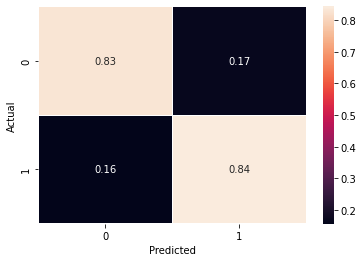

In [80]:
data6 = {"y_Actual":y_test,
        "y_Predicted": Predicciones_test
        }

df = pd.DataFrame(data6, columns=['y_Actual','y_Predicted'])

confusion_matrix6 = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

#sns.heatmap(confusion_matrix,annot=True,fmt='g')
#plt.show()

confusion_matrix_Normalizada5=confusion_matrix6.astype('float') / confusion_matrix6.sum(axis=1)[:, np.newaxis]
sns.heatmap(confusion_matrix_Normalizada5, annot=True,linewidths = 0.01)
plt.show()

# **5) Evaluación de Modelos**

## **Tabla Metricas**

In [81]:
df_comparacion_Modelos=pd.DataFrame({
    "Modelos":["Árbol de decisión","Arbol Optimizado","RandomForest","RandomForestOptimo","GradientBoosting","RegresionLogistica"],
    "Accuracy":[Accuracy_AD_VS_DD,Accuray_test_Optimo,Accuray_test_RF,Accuray_test_RF_O,Accuray_test_GBC,Accuracy_Log_test],
    "f1_0":[f1_Score_AD_0,f1_Score_AD1_0,f1_Score_RF_0,f1_Score_RF1_0,f1_Score_B_0,f1_Score_Log1_0],
    "f1_1":[f1_Score_AD_1,f1_Score_AD1_1,f1_Score_RF_1,f1_Score_RF1_1,f1_Score_B_1,f1_Score_Log1_1]})
df_comparacion_Modelos.sort_values("Accuracy",ascending=False)

,Modelos,Accuracy,f1_0,f1_1
5,RegresionLogistica,0.84,0.82,0.85
2,RandomForest,0.79,0.73,0.83
3,RandomForestOptimo,0.78,0.71,0.82
1,Arbol Optimizado,0.76,0.70,0.81
0,Árbol de decisión,0.74,0.68,0.78
4,GradientBoosting,0.70,0.64,0.75


## **Graficas Matrix de Confusion**

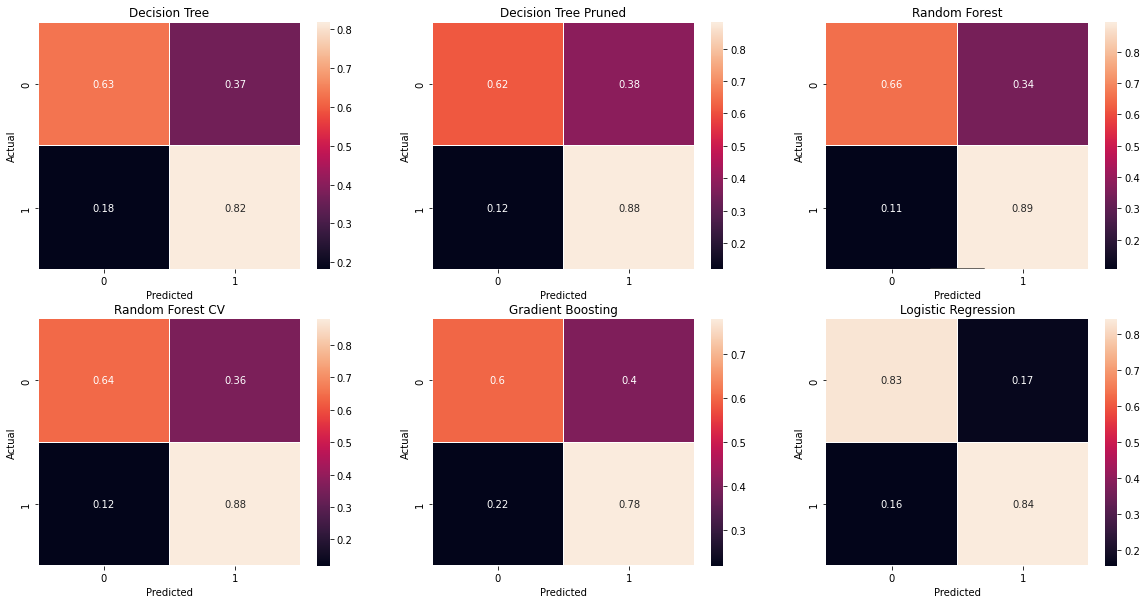

In [82]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
 
#fig.suptitle('confusion matrix')
 
iris = sns.load_dataset("iris")
 

sns.heatmap(confusion_matrix_Normalizada, annot=True,linewidths = 0.01,ax=axes[0, 0])
axes[0, 0].set_title('Decision Tree')
sns.heatmap(confusion_matrix_Normalizada1, annot=True,linewidths = 0.01,ax=axes[0, 1])
axes[0, 1].set_title('Decision Tree Pruned')

sns.boxplot(ax=axes[0, 2], data=iris, x='species', y='sepal_width')

sns.heatmap(confusion_matrix_Normalizada2, annot=True,linewidths = 0.01,ax=axes[0, 2])
axes[0, 2].set_title('Random Forest')

sns.heatmap(confusion_matrix_Normalizada3, annot=True,linewidths = 0.01,ax=axes[1, 0])
axes[1, 0].set_title('Random Forest CV')

sns.heatmap(confusion_matrix_Normalizada4, annot=True,linewidths = 0.01,ax=axes[1, 1])
axes[1, 1].set_title('Gradient Boosting')

sns.heatmap(confusion_matrix_Normalizada5, annot=True,linewidths = 0.01,ax=axes[1, 2])
axes[1, 2].set_title('Logistic Regression')

plt.show()

* El mejor modelo es Regresion Logistica

## **Curvas ROC**

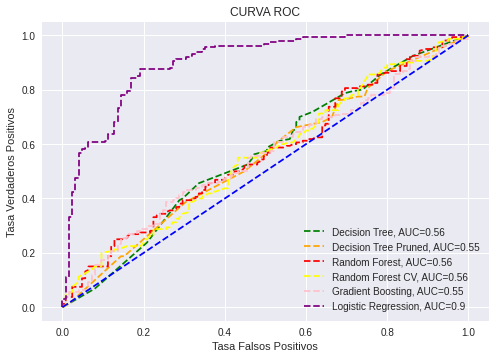

In [83]:
## Diagonal
#Probabilidad_Modelo1_test[::,1:2]
fpr, tpr, thresholds = roc_curve(y_test, Probabilidad_test_M1[:,1])
fpr1, tpr1, thresholds1 = roc_curve(y_test, Probabilidad_test_M2[:,1])
fpr2, tpr2, thresholds2 = roc_curve(y_test, Probabilidad_test_M3[:,1])
fpr3, tpr3, thresholds3 = roc_curve(y_test, Probabilidad_test_M4[:,1])
fpr4, tpr4, thresholds4 = roc_curve(y_test, Probabilidad_test_M5[:,1])
fpr5, tpr5, thresholds5 = roc_curve(y_test, Probabilidad_test)

AUC1=round(roc_auc_score(y_test, Probabilidad_test_M1[:,1]),2)
AUC2=round(roc_auc_score(y_test, Probabilidad_test_M2[:,1]),2)
AUC3=round(roc_auc_score(y_test, Probabilidad_test_M3[:,1]),2)
AUC4=round(roc_auc_score(y_test, Probabilidad_test_M4[:,1]),2)
AUC5=round(roc_auc_score(y_test, Probabilidad_test_M5[:,1]),2)
AUC6=round(roc_auc_score(y_test, Probabilidad_test),2)

random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

import matplotlib.pyplot as plt
plt.style.use('seaborn')

plt.plot(fpr,tpr,linestyle="--",color="green",label="Decision Tree, AUC="+str(AUC1))
plt.plot(fpr1,tpr1,linestyle="--",color="orange",label="Decision Tree Pruned, AUC="+str(AUC2))
plt.plot(fpr2,tpr2,linestyle="--",color="red",label="Random Forest, AUC="+str(AUC3))
plt.plot(fpr3,tpr3,linestyle="--",color="yellow",label="Random Forest CV, AUC="+str(AUC4))
plt.plot(fpr4,tpr4,linestyle="--",color="pink",label="Gradient Boosting, AUC="+str(AUC5))
plt.plot(fpr5,tpr5,linestyle="--",color="purple",label="Logistic Regression, AUC="+str(AUC6))

plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.title("CURVA ROC")
plt.xlabel("Tasa Falsos Positivos")
plt.ylabel("Tasa Verdaderos Positivos")
plt.legend()
plt.show()

In [84]:
AUC1

0.56

In [85]:
AUC2

0.55

In [86]:
AUC3

0.56

In [87]:
AUC4

0.56

In [88]:
AUC5

0.55

In [89]:
AUC6

0.9